# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [242]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.decomposition import NMF

## 1. Data

http://cbcl.mit.edu/cbcl/software-datasets/FaceData.html

In [243]:
X = np.loadtxt('cbcl/svm.train.normgrey')

In [244]:
X.shape

(6977, 362)

In [245]:
X = X[:, :-1]

In [246]:
X.shape

(6977, 361)

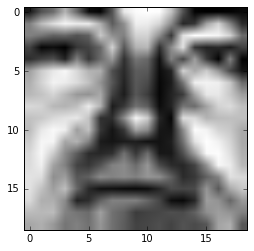

In [247]:
plt.imshow(X[100].reshape((19, 19)), cmap=cm.gray)

## 2. NMF - Nonnegative Matrix Factorization

In [248]:
# Definition and parameter settings

n_comp = 49
nmf = NMF(n_components=n_comp, beta=1.0, sparseness='components', max_iter=10)

/Users/varundn/anaconda/lib/python2.7/site-packages/sklearn/decomposition/nmf.py:997: DeprecationWarning: Controlling regularization through the sparseness, beta and eta arguments is only available for 'pg' solver, which will be removed in release 0.19. Use another solver with L1 or L2 regularization instead.
  " regularization instead.", DeprecationWarning)


In [249]:
# Performs the matrix factorization

nmf.fit(X)

NMF(alpha=0.0, beta=1.0, eta=0.1, init=None, l1_ratio=0.0, max_iter=10,
  n_components=49, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness='components', tol=0.0001, verbose=0)

In [250]:
# Returns the transformed data

X_transformed_nmf = nmf.fit_transform(X)

In [251]:
X_transformed_nmf.shape

(6977, 49)

In [252]:
# Way to access the components learned by the model

loadings = nmf.components_

In [253]:
loadings.shape

(49, 361)

## 3. Visualizing the components

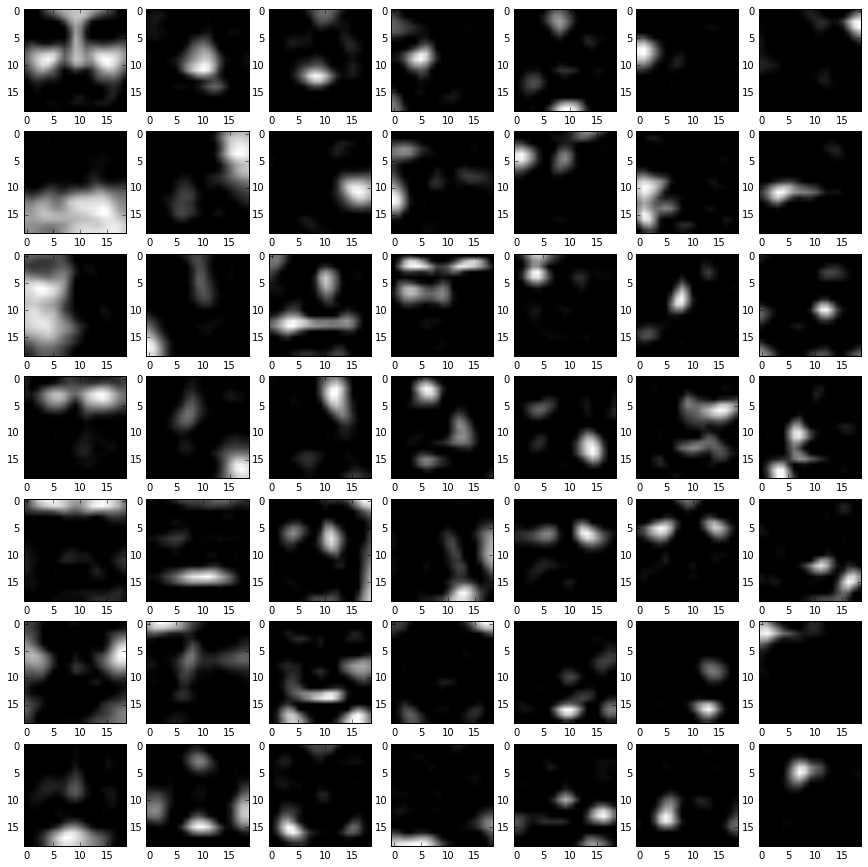

In [254]:
f, axarr = plt.subplots(int(np.sqrt(n_comp)), int(np.sqrt(n_comp)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(n_comp))):
    for i in range(int(np.sqrt(n_comp))):
        axarr[i, j].imshow(loadings[comp_ix].reshape((19, 19)), cmap=cm.gray)
        comp_ix += 1

In [255]:
print ('Reconstructions error: ', nmf.reconstruction_err_)

('Reconstructions error: ', 216.07412217279565)


## 4. Reconstructing an image

In [256]:
# Do you understand what's happening here?

X_sample_rec_nmf = np.dot(X_transformed_nmf[50], loadings)

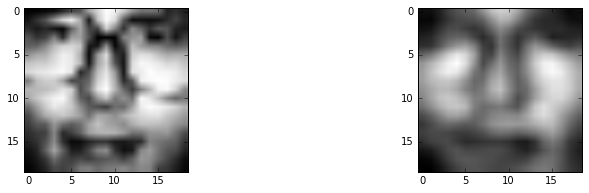

In [257]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[50].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray)

## 5. Comparison with PCA

In [258]:
from sklearn.decomposition import PCA

In [259]:
pca = PCA(n_components=n_comp)

In [260]:
X_transformed_pca = pca.fit_transform(X)

In [261]:
X_transformed_pca.shape

(6977, 49)

In [262]:
principal_components = pca.components_

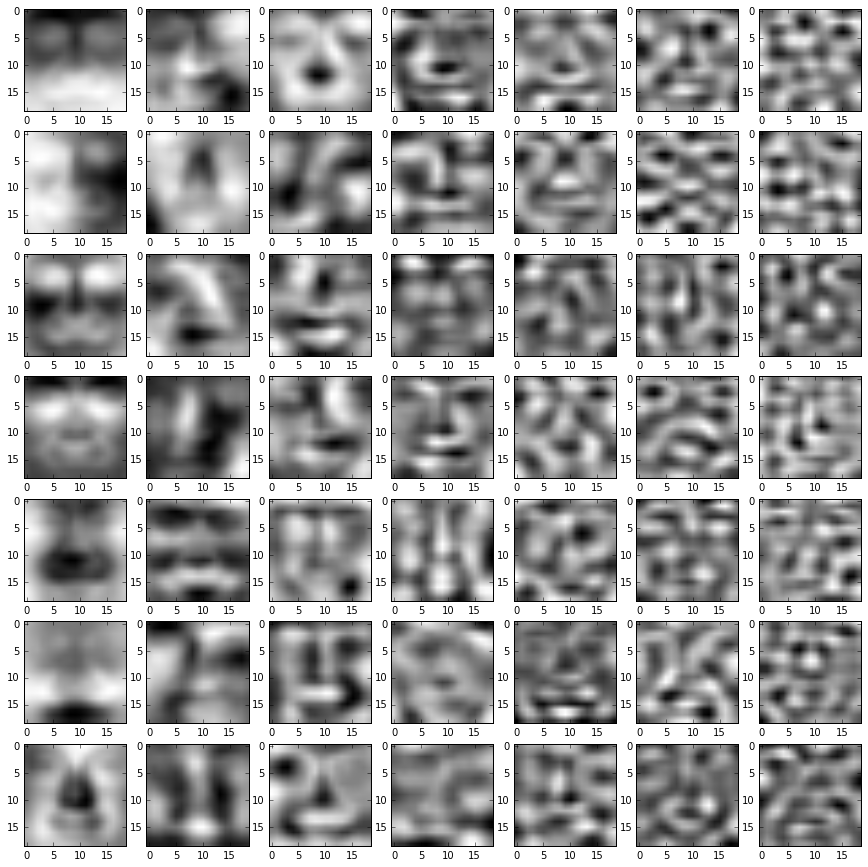

In [263]:
f, axarr = plt.subplots(int(np.sqrt(n_comp)), int(np.sqrt(n_comp)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(n_comp))):
    for i in range(int(np.sqrt(n_comp))):
        axarr[i, j].imshow(principal_components[comp_ix].reshape((19, 19)), cmap=cm.gray)
        comp_ix += 1

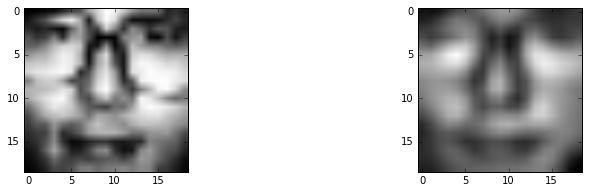

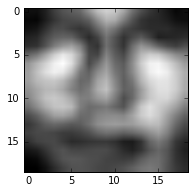

In [264]:
X_sample_rec_pca = np.dot(X_transformed_pca[50], principal_components)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[50].reshape((19, 19)), cmap=cm.gray)

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_pca.reshape((19, 19)), cmap=cm.gray)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray)